# State sponsored Cyber Incidents

© 2022, S. Droz

Analyze the state sponsored Cyber Incidents. Data provided by 
https://www.cfr.org/interactive/cyber-operations

In [2]:
import piplite
await piplite.install('squarify')
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import squarify
from io import StringIO
from pyodide import open_url
#import matplotlib
%matplotlib inline

In [3]:
url = 'https://www.cfr.org/interactive/cyber-operations/export-incidents?_format=csv'
r = open_url(url)
incidents = pd.read_csv( r , parse_dates=['Date'] )
incidents[incidents['Date'].dt.year == 2019]

,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,Sources_1,Sources_2,Sources_3
274,"Targeting of German energy technology, chemica...",2019-07-24,Believed to be the work of Winnti.,A threat actor used a Trojan horse to gain rem...,NaN,Germany,China,Espionage,Private sector,https://www.reuters.com/article/us-germany-cyb...,https://www.ibtimes.com/cyber-war-news-german-...,NaN
275,Targeting of nongovernmental organizations and...,2019-12-29,Bronze President,The China-affiliated threat actor Bronze Presi...,NaN,NaN,China,Espionage,"Government, Civil society",https://www.secureworks.com/research/bronze-pr...,NaN,NaN
276,Cyber espionage by the United Arab Emirates (UAE),2019-01-30,Believed to be the work of the UAE government.,Former U.S. government intelligence operatives...,NaN,"Qatar, Turkey, Yemen",United Arab Emirates,Espionage,"Government, Civil society",https://www.reuters.com/article/us-usa-spying-...,https://www.nbcnews.com/tech/security/how-uae-...,NaN
277,Targeting of U.S. university and think tank wi...,2019-02-22,NaN,"A threat actor used the malware BabyShark, whi...",NaN,NaN,Korea (Democratic People's Republic of),Espionage,Private sector,https://unit42.paloaltonetworks.com/new-babysh...,NaN,NaN
278,Targeting of Middle Eastern oil companies,2019-12-04,APT 34,"Using a new wiper malware called ZeroCleare, I...",NaN,Oil companies in the Middle East,Iran (Islamic Republic of),Data destruction,Private sector,https://www.ibm.com/downloads/cas/OAJ4VZNJ,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
343,Targeting of over sixty universities in multip...,2019-09-11,Believed to be the work of Cobalt Dickens.,A threat actor launched a phishing operation w...,NaN,"United States, United Kingdom, Australia, Cana...",Iran (Islamic Republic of),Espionage,"Civil society, Private sector",https://www.secureworks.com/blog/cobalt-dicken...,https://www.cyberscoop.com/cobalt-dickens-iran...,NaN
344,Targeting of industrial control systems,2019-11-23,APT 33,Iran-aligned threat actor APT 33 targeted indu...,NaN,"Industrial control systems manufacturers, supp...",Iran (Islamic Republic of),Espionage,Private sector,https://arstechnica.com/information-technology...,https://www.cyberscoop.com/apt33-microsoft-ira...,NaN
345,Compromise of Bayer Pharmaceuticals,2019-04-04,Wicked Panda,A threat actor put malicious software on Bayer...,NaN,Bayer Pharmaceuticals,China,Data destruction,Private sector,https://www.cyberscoop.com/bayer-breached-chin...,NaN,NaN
346,Targeting of senior members of Tibetan groups,2019-09-24,Believed to be the work of Poison Carp.,A threat actor aimed to infect mobile phones b...,NaN,Tibet,China,Espionage,"Civil society, Government",https://www.cyberscoop.com/tibet-citizen-lab-s...,https://www.reuters.com/article/us-china-cyber...,https://citizenlab.ca/2019/09/poison-carp-tibe...


## Distribution
What types of attacks prevail

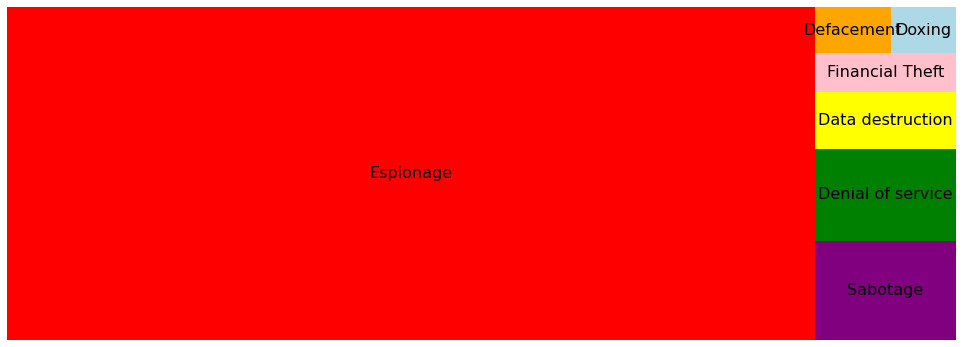

In [4]:
col = 'Type'
# Map values to colors:
c = dict( zip( [ "Data destruction", "Defacement", "Denial of service", "Doxing", "Sabotage", "Espionage", "Financial Theft" ],  [ 'yellow', 'orange', 'green', 'lightblue',  'purple','red', 'pink' ] ) )

x = incidents.groupby(col).size().reset_index()
x.columns = [col,'Numbers']
x = x.sort_values("Numbers", ascending=False)
#display( x )
w = 17
#fig, ax = plt.subplots(figsize=(w,w/1.61803398875))
fig, ax = plt.subplots(figsize=(w,w/25*9))
x['color'] = x[col].apply(lambda z: c[z])
squarify.plot(
    sizes=x['Numbers'],
    label=x.apply(lambda x: x[col], axis=1),
    color=x.color,
    text_kwargs={'fontsize':16}
)
ax = plt.axis('off')


## How many operations are observed over the years?

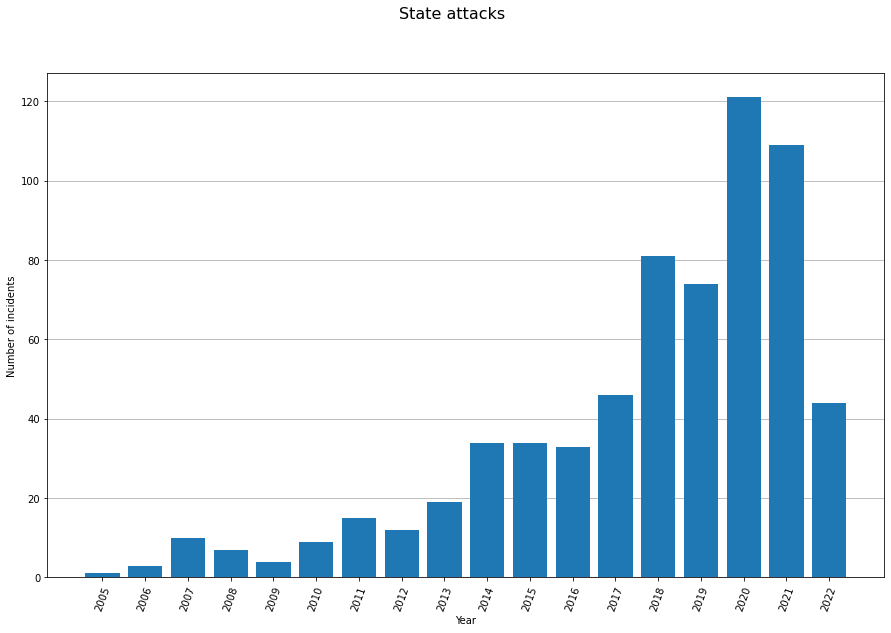

In [5]:
year = 2022
w = 15
fig, ax = plt.subplots(figsize=(w,w/1.61803398875))
a = incidents[(~incidents['Date'].isnull()) & ( incidents['Date'].dt.year <= year )]
x = range(2005,year+1) 
ax.bar( x, list(a.groupby( incidents['Date'].dt.year ).size()) )
plt.xticks(rotation=70)
ax.set_xticks(x)
fig.suptitle('State attacks', fontsize=16)
ax.set_xlabel('Year')
_ = ax.set_ylabel('Number of incidents')
ax.grid(True ,axis='y')
ax.set_axisbelow(True)

## How many are espionage?

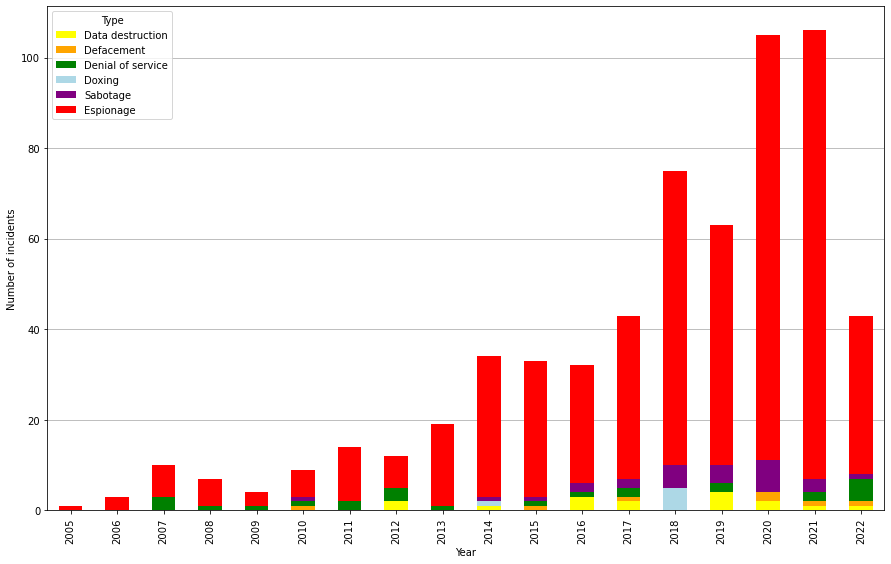

In [6]:
w = 15
fig, ax = plt.subplots(figsize=(w,w/1.61803398875))
# https://stackoverflow.com/questions/23415500/pandas-plotting-a-stacked-bar-chart
x = incidents[ (~incidents['Date'].isnull()) & ( incidents['Date'].dt.year <= year )][['Date','Type']]
x['Year'] = x['Date'].dt.year
y=x.groupby(['Year','Type']).size().unstack().fillna(0)
c = [ 'yellow', 'orange', 'green', 'lightblue',  'purple','red' ]
y = y[[ "Data destruction", "Defacement", "Denial of service", "Doxing", "Sabotage", "Espionage" ]]
ax.set_ylabel('Number of incidents')
_ = y.plot(kind='bar', stacked=True, ax=ax, color=c)
ax.grid(True ,axis='y')
ax.set_axisbelow(True)

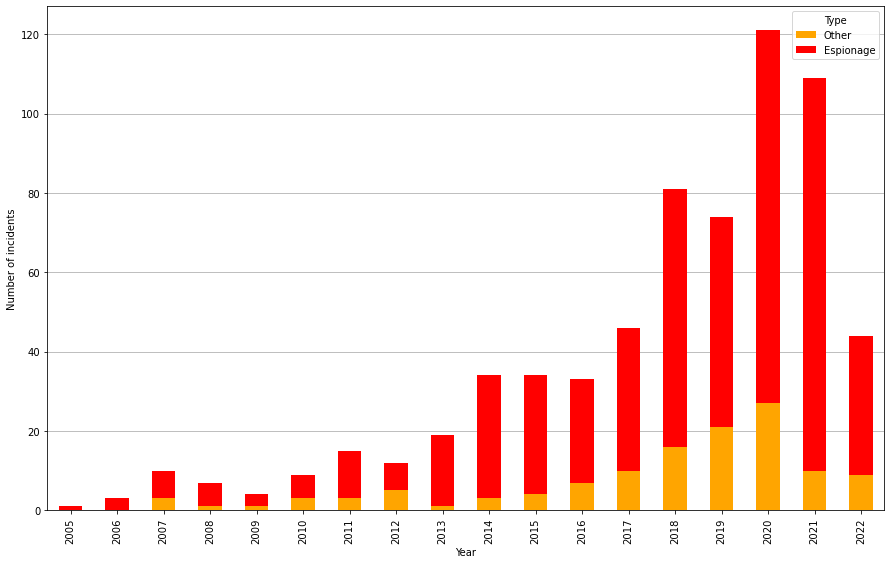

In [7]:
w = 15
fig, ax = plt.subplots(figsize=(w,w/1.61803398875))

x = incidents[(~incidents['Date'].isnull()) & ( incidents['Date'].dt.year <=year )].reindex()
x['Year'] = x['Date'].dt.year
x.loc[x['Type']!= 'Espionage','Type'] = 'Other'
y=x.groupby(['Year','Type']).size().unstack().fillna(0)
y = y[[ "Other", "Espionage" ]]
ax.set_ylabel('Number of incidents')
_ = y.plot(kind='bar', stacked=True, ax=ax, color=[ 'orange', 'red' ])
ax.grid(True ,axis='y')
ax.set_axisbelow(True)

## Who are the attackers

In [8]:
import json
r = open_url( 'https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/slim-2/slim-2.json' )
cntry_map  = { x['name']: x['alpha-2'] for x in json.load(r) }
cntry_map['United States'] =  'US'
cntry_map['Vietnam'] = 'VN'
cntry_map['Korea (Republic of)'] = 'KR'
cntry_map['Korea (Republic of)'] = 'KR'
cntry_map['Palestine'] = 'PS'
cntry_map['Taiwan'] = 'TW'
cntry_map['The Philippines'] = 'PH'
cntry_map['United Kingdom'] = 'UK'

In [9]:
#set( incidents['Main Sponsor'].unique() ).difference( set( cntry_map.keys() ) )

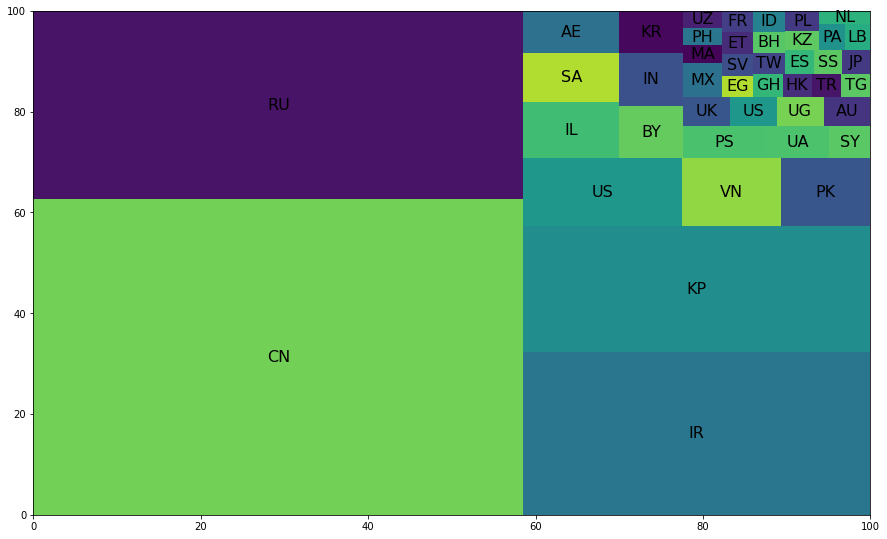

In [10]:
#incidents['Sponsor'].value_counts().plot(kind='pie')
col = 'Main Sponsor'
incidents['Main Sponsor'] = incidents['Sponsor'].str.split(",", n = 1, expand = True)[0]
x = incidents.groupby(col).size().reset_index()
x.columns = [col,'Numbers']
x = x.sort_values("Numbers", ascending=False)
#display( x )
w = 15
fig, ax = plt.subplots(figsize=(w,w/1.61803398875))
#norm = matplotlib.colors.Normalize(vmin=x['Numbers'].min(), vmax=x['Numbers'].max())
#x['color'] = x['Numbers'].apply(lambda x: plt.cm.Greens(norm(x)))


_ =squarify.plot(
    sizes=x['Numbers'],
    label=x.apply(lambda x: cntry_map[x[col]] , axis=1),
    #color=x.color,
    text_kwargs={'fontsize':16}
)


## Who are victims

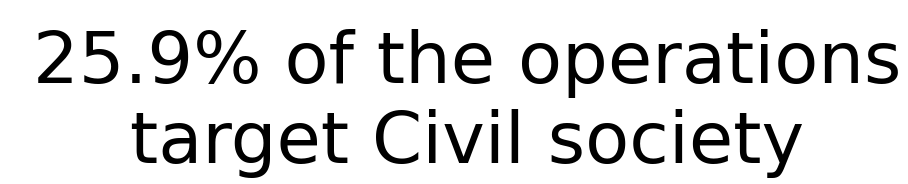

In [11]:
cs = len( incidents[(~incidents['Category'].isnull()) & (incidents['Category'].str.contains('Civil society'))])
tl = len( incidents )
100 * cs / tl
w = 15
fig, ax = plt.subplots(figsize=(w,1))
ax = plt.axis('off')
_ = plt.text(0.55, 0.6, "{r:2.1f}% of the operations\ntarget Civil society".format(r=100 * cs / tl), size=72,
         ha="center", va="top"
         )
 

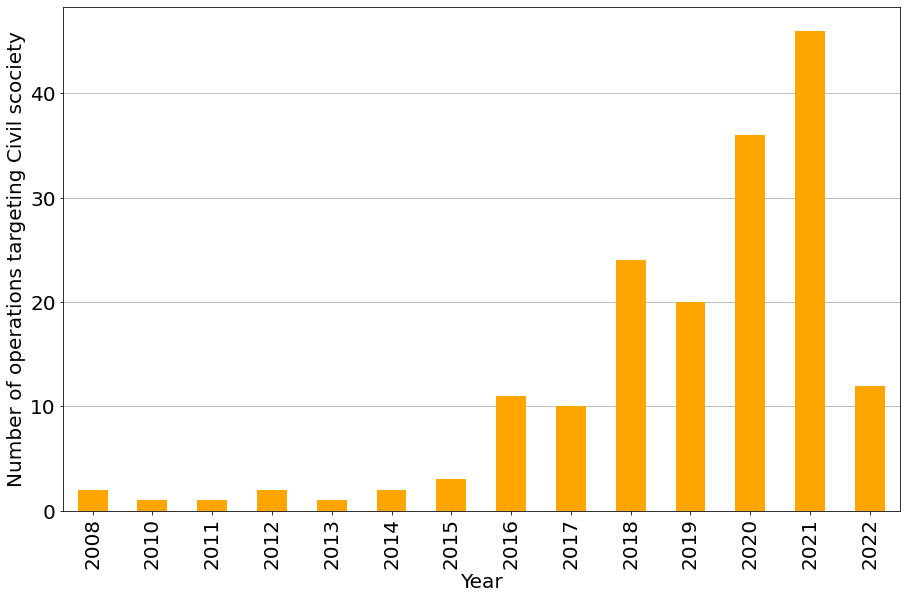

In [12]:
tmp = incidents[(~incidents['Date'].isnull())&(~incidents['Category'].isnull()) & (incidents['Category'].str.contains('Civil society'))]


w = 15
fig, ax = plt.subplots(figsize=(w,w/1.61803398875))
tmp.groupby(tmp.Date.dt.year).size().plot(kind='bar', stacked=True, ax=ax, color=[ 'orange'  ],fontsize=20)
ax.set_ylabel('Number of operations targeting Civil scociety',fontsize=20)
ax.set_xlabel('Year',fontsize=20)
ax.grid(True ,axis='y')
ax.set_axisbelow(True)

## Number of unique active states / year

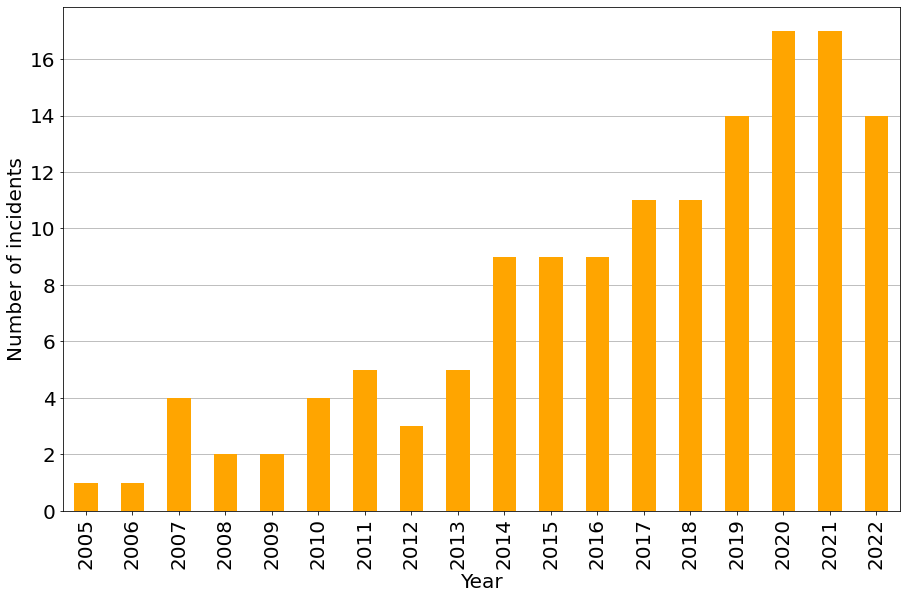

In [13]:
tmp = incidents[(~incidents['Date'].isnull())][['Date', 'Main Sponsor']]
tmp['Year'] = tmp['Date'].apply( lambda x: x.year)

w = 15
fig, ax = plt.subplots(figsize=(w,w/1.61803398875))

x = tmp.groupby('Year')['Main Sponsor'].nunique(dropna=False)
_ = x.plot(kind='bar', stacked=True, ax=ax, color=[ 'orange'  ],fontsize=20)
ax.set_ylabel('Number of incidents',fontsize=20)
ax.set_xlabel('Year',fontsize=20)
ax.grid(True ,axis='y')
ax.set_axisbelow(True)